## Image Classification: Version 2
Using sci-kit learn

In [1]:
# !pip3 install numpy matplotlib tensorflow
import tensorflow as tf

In [2]:
import tensorflow
import numpy as np
#!pip3 install opencv-python
#import opencv as cv2
import cv2 
import matplotlib.pyplot as plt
import os
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
#import tensorflow_datasets as tfds
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import numpy as np

In [5]:
labels = ['WithMask', 'WithoutMask']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
#Now we can easily fetch our train and validation data.
train = get_data('Face_Mask_Dataset/Train')
test = get_data('Face_Mask_Dataset/Test')
val = get_data('Face_Mask_Dataset/Validation')

<ipython-input-5-a464d037a7bc>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [7]:
print(train.shape)
print(test.shape)
print(val.shape)

(10000, 2)
(992, 2)
(800, 2)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

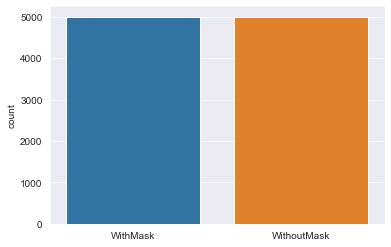

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("WithMask")
    else:
        l.append("WithoutMask")
sns.set_style('darkgrid')
sns.countplot(l)

In [55]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

Text(0.5, 1.0, 'WithMask')

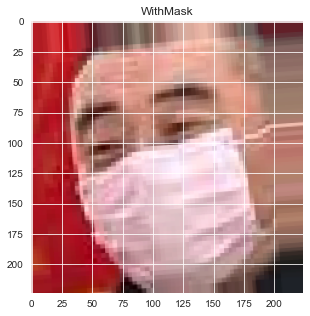

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'WithoutMask')

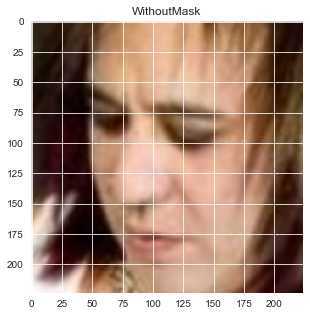

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [11]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [12]:
# data augmentation on the training data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [13]:
#Step 5:- Define the Model 

#Let’s define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. 
#A dropout layer is added after the 3rd maxpool operation to avoid overfitting

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [15]:
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [16]:
#train model with 500 epochs since the learning rate is really small
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 661s 2s/step - loss: 0.1547 - accuracy: 0.9464 - val_loss: 0.0428 - val_accuracy: 0.9862
Epoch 2/10
313/313 [==============================] - 508s 2s/step - loss: 0.0589 - accuracy: 0.9783 - val_loss: 0.0569 - val_accuracy: 0.9812
Epoch 3/10
313/313 [==============================] - 488s 2s/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 0.0193 - val_accuracy: 0.9937
Epoch 4/10
313/313 [==============================] - 503s 2s/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0265 - val_accuracy: 0.9900
Epoch 5/10
313/313 [==============================] - 542s 2s/step - loss: 0.0239 - accuracy: 0.9913 - val_loss: 0.0334 - val_accuracy: 0.9837
Epoch 6/10
313/313 [==============================] - 543s 2s/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0241 - val_accuracy: 0.9900
Epoch 7/10
313/313 [==============================] - 519s 2s/step - loss: 0.0245 - accuracy: 0.9908 - val_loss: 0.0123 - val_accuracy: 0.9962
Epoch 8/10

[0.946399986743927, 0.9782999753952026, 0.9889000058174133, 0.9919999837875366, 0.9912999868392944, 0.9929999709129333, 0.9908000230789185, 0.9944999814033508, 0.994700014591217, 0.9955999851226807]


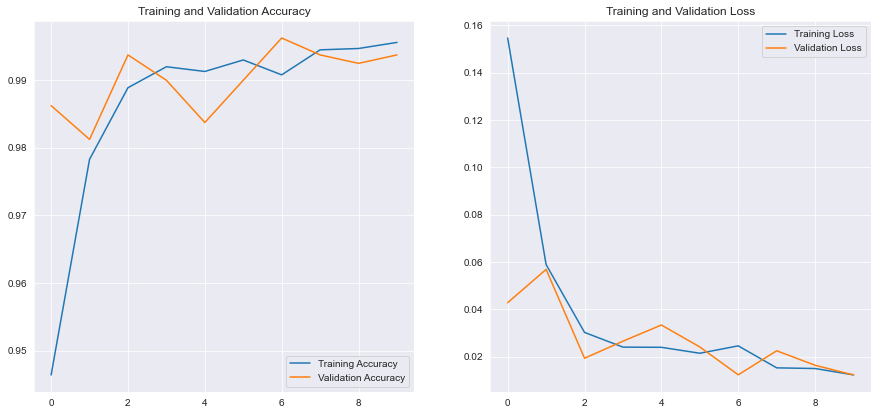

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
x_test=[]
y_test=[]

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_test = np.array(x_test) / 255
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [61]:
test_loss = model.evaluate(x_val, y_val)

25/25 [==============================] - 25s 943ms/step - loss: 0.0122 - accuracy: 0.9937


In [62]:
predictions = model.predict(x_val)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [67]:
def print_mislabeled_images(class_names, val_images, val_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (y_val == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = x_val[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

IndexError: index 5 is out of bounds for axis 0 with size 5

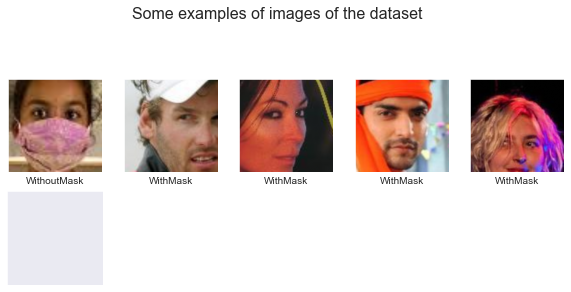

In [68]:
print_mislabeled_images(labels, x_val, y_val, pred_labels)

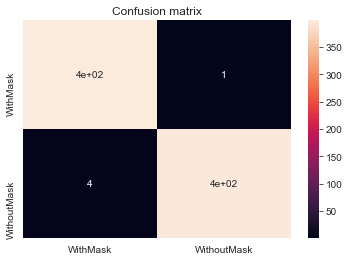

In [72]:
import seaborn as sns
CM = confusion_matrix(y_val, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=labels, 
           yticklabels=labels, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

## scratch

In [69]:
predictions = (model.predict(x_val)).astype("int32")
predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions[0:320], target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

In [71]:
print(classification_report(y_val, predictions[0:800], target_names = ['No Mask (Class 0)','Masked (Class 1)']))

                   precision    recall  f1-score   support

No Mask (Class 0)       0.50      0.78      0.61       400
 Masked (Class 1)       0.51      0.23      0.32       400

         accuracy                           0.50       800
        macro avg       0.50      0.50      0.46       800
     weighted avg       0.50      0.50      0.46       800



In [73]:
print(y_val.shape,predictions.shape)

(800,) (1600,)


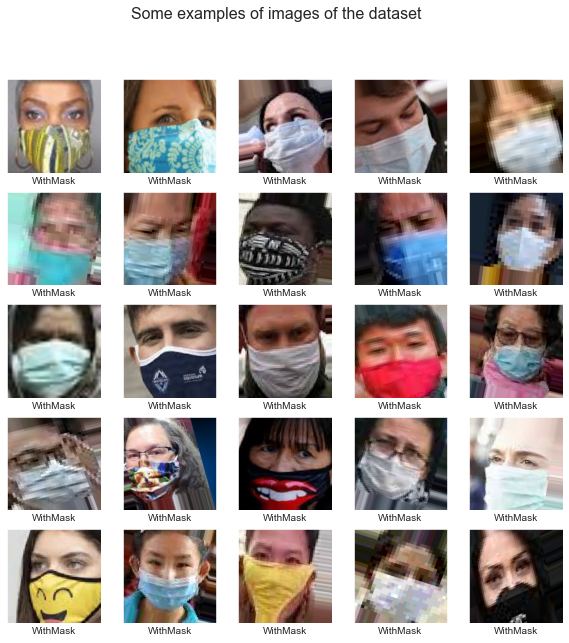

In [76]:
display_examples(labels, x_val, y_val)